## The Data

The following analysis sources songs from the top 10 most streamed artists on Spotify (as of April 2025) and uses unsupervised learning techniques to uncover any trends in the lyrics of the most listened to artists. It also attempts to reveal Spotify users' tastes, as well as genre trends when it comes to lyrics. The data is scraped from Genius' API and includes the artist's name, song titles, and lyrics.

In [2]:
## Imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import re
import os
import csv
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from google.colab import drive
from google.colab import files
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches

## Scraping Data

In [ ]:
# Access token

GENIUS_API_TOKEN = 'mJ2GNeEIKQ13JnyJi-FIwnHnSZMXoxBLDVoBa7l3-Kx1iNmumYTVj8S6cIxKSB78'

In [ ]:
# Get artist info

def request_artist_info(artist_name, page):
    base_url = 'https://api.genius.com'
    headers = {'Authorization': 'Bearer ' + GENIUS_API_TOKEN}
    search_url = base_url + '/search'
    params = {'q': artist_name, 'per_page': 10, 'page': page}
    response = requests.get(search_url, params=params, headers=headers)
    if response.status_code != 200:
        print(f"Error: {response.status_code} - {response.text}")
        return None
    return response

In [ ]:
# Get song URLs for artist

def request_song_url(artist_name, song_cap):
    page = 1
    songs = []

    while True:
        response = request_artist_info(artist_name, page)
        if response is None:
            break
        json_data = response.json()

        if 'response' not in json_data or 'hits' not in json_data['response']:
            print("Error: 'response' or 'hits' key not found in the response data")
            break

        song_info = []

        for hit in json_data['response']['hits']:
            if artist_name.lower() in hit['result']['primary_artist']['name'].lower():
                song_info.append(hit)

        for song in song_info:
            if len(songs) < song_cap:
                url = song['result']['url']
                songs.append(url)

        if len(songs) == song_cap:
            break
        else:
            page += 1

    print('Found {} songs by {}'.format(len(songs), artist_name))
    return songs

In [ ]:
# Get lyrics from songs

def scrape_song_lyrics(url):
    page = requests.get(url)
    html = BeautifulSoup(page.text, 'html.parser')
    lyrics_divs = html.find_all('div', attrs={'data-lyrics-container': 'true'})

    if not lyrics_divs:
        print(f"Could not find lyrics for {url}")
        return ""

    lyrics = '\n'.join([div.get_text(separator="\n") for div in lyrics_divs])
    lyrics = re.sub(r'[\(\[].*?[\)\]]', '', lyrics)
    lyrics = os.linesep.join([s for s in lyrics.splitlines() if s])

    lyrics = lyrics.replace('\n', ' ')

    return lyrics

In [ ]:
# Write lyrics to CSV file

def write_lyrics_to_csv(artist_name, song_count):
    if not os.path.exists('lyrics'):
        os.makedirs('lyrics')
    file_path = 'lyrics/' + artist_name.lower().replace(' ', '_') + '.csv'

    with open(file_path, 'w', newline='', encoding='utf-8') as csvfile:
        fieldnames = ['Song', 'Lyrics']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        urls = request_song_url(artist_name, song_count)

        for url in urls:
            song_name = url.split('/')[-1].replace('-', ' ').title()
            song_name = song_name.replace(artist_name.title() + ' ', '').replace(' Lyrics', '')
            lyrics = scrape_song_lyrics(url)
            if lyrics:
              for line in lyrics.splitlines():
                writer.writerow({'Song': song_name, 'Lyrics': line})

    print(f'Lyrics written to {file_path}')

In [ ]:
# Bruno Mars

write_lyrics_to_csv('Bruno Mars', 50)

df_bm = pd.read_csv('lyrics/bruno_mars.csv')

df_bm['Artist'] = 'Bruno Mars'

Found 50 songs by Bruno Mars
Lyrics written to lyrics/bruno_mars.csv


In [ ]:
# The Weekend

write_lyrics_to_csv('The Weekend', 50)

df_tw = pd.read_csv('lyrics/the_weekend.csv')

df_tw['Artist'] = 'The Weekend'

Found 50 songs by The Weekend
Lyrics written to lyrics/the_weekend.csv


In [ ]:
# Taylor Swift

write_lyrics_to_csv('Taylor Swift', 50)

df_ts = pd.read_csv('lyrics/taylor_swift.csv')

df_ts['Artist'] = 'Taylor Swift'

Found 50 songs by Taylor Swift
Lyrics written to lyrics/taylor_swift.csv


In [ ]:
# Lady Gaga

write_lyrics_to_csv('Lady Gaga', 50)

df_lg = pd.read_csv('lyrics/lady_gaga.csv')

df_lg['Artist'] = 'Lady Gaga'

Found 50 songs by Lady Gaga
Lyrics written to lyrics/lady_gaga.csv


In [ ]:
# Kendrick Lamar

write_lyrics_to_csv('Kendrick Lamar', 50)

df_kl = pd.read_csv('lyrics/kendrick_lamar.csv')

df_kl['Artist'] = 'Kendrick Lamar'

Found 50 songs by Kendrick Lamar
Lyrics written to lyrics/kendrick_lamar.csv


In [ ]:
# Coldplay

write_lyrics_to_csv('Coldplay', 50)

df_c = pd.read_csv('lyrics/coldplay.csv')

df_c['Artist'] = 'Coldplay'

Found 50 songs by Coldplay
Lyrics written to lyrics/coldplay.csv


In [ ]:
# Billie Eilish

write_lyrics_to_csv('Billie Eilish', 50)

df_be = pd.read_csv('lyrics/billie_eilish.csv')

df_be['Artist'] = 'Billie Eilish'

Found 50 songs by Billie Eilish
Lyrics written to lyrics/billie_eilish.csv


In [ ]:
# Drake

write_lyrics_to_csv('Drake', 50)

df_d = pd.read_csv('lyrics/drake.csv')

df_d['Artist'] = 'Drake'

Found 50 songs by Drake
Lyrics written to lyrics/drake.csv


In [ ]:
# Bad Bunny

write_lyrics_to_csv('Bad Bunny', 50)

df_bb = pd.read_csv('lyrics/bad_bunny.csv')

df_bb['Artist'] = 'Bad Bunny'

Found 50 songs by Bad Bunny
Lyrics written to lyrics/bad_bunny.csv


In [ ]:
# Eminem

write_lyrics_to_csv('Eminem', 50)

df_e = pd.read_csv('lyrics/eminem.csv')

df_e['Artist'] = 'Eminem'

Found 50 songs by Eminem
Lyrics written to lyrics/eminem.csv


## Dataframe

In [ ]:
# Merging all dfs

df = pd.concat([df_bm, df_tw, df_ts, df_lg, df_kl, df_c, df_be, df_d, df_bb, df_e])

In [3]:
# Importing dataframe

data_dir = '/content/drive/My Drive/Colab Notebooks'
drive.mount('/content/drive')
os.chdir(data_dir)

Mounted at /content/drive


In [4]:
# Read dataframe

df = pd.read_csv('top10artists2.csv')

## EDA

In [ ]:
# Head

df.head()

,Song,Lyrics,Artist
0,Thats What I Like,205 Contributors Translations Français Deutsch...,Bruno Mars
1,Finesse Remix,178 Contributors Finesse Lyrics Drop top Pors...,Bruno Mars
2,When I Was Your Man,111 Contributors Translations Deutsch العربية ...,Bruno Mars
3,Versace On The Floor,113 Contributors Translations Português Deutsc...,Bruno Mars
4,24K Magic,171 Contributors Translations Português Españo...,Bruno Mars


In [ ]:
# Tail

df.tail()

,Song,Lyrics,Artist
495,Gnat,388 Contributors Translations Türkçe Русский P...,Eminem
496,White America,260 Contributors Translations Türkçe Italiano ...,Eminem
497,Guts Over Fear,318 Contributors Translations Português Русски...,Eminem
498,Im Back,286 Contributors Translations Русский Italiano...,Eminem
499,Big Sean And Babytron Tobey,298 Contributors Translations Русский Portuguê...,Eminem


In [ ]:
# Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Song    500 non-null    object
 1   Lyrics  500 non-null    object
 2   Artist  500 non-null    object
dtypes: object(3)
memory usage: 11.8+ KB


## Model 1: KMeans

In [5]:
# Encoding categorical data

df2 = df.copy()

le_ed = LabelEncoder()

df2['Artist'] = le_ed.fit_transform(df['Artist'])

In [6]:
# Encoding data: Tfidvectorizer

vectorizer = TfidfVectorizer(stop_words='english')

tfidf_matrix = vectorizer.fit_transform(df2['Lyrics'])

In [7]:
# Reducing dimensionality with PCA

pca = PCA(n_components=5)

x_pca = pca.fit_transform(tfidf_matrix.toarray())

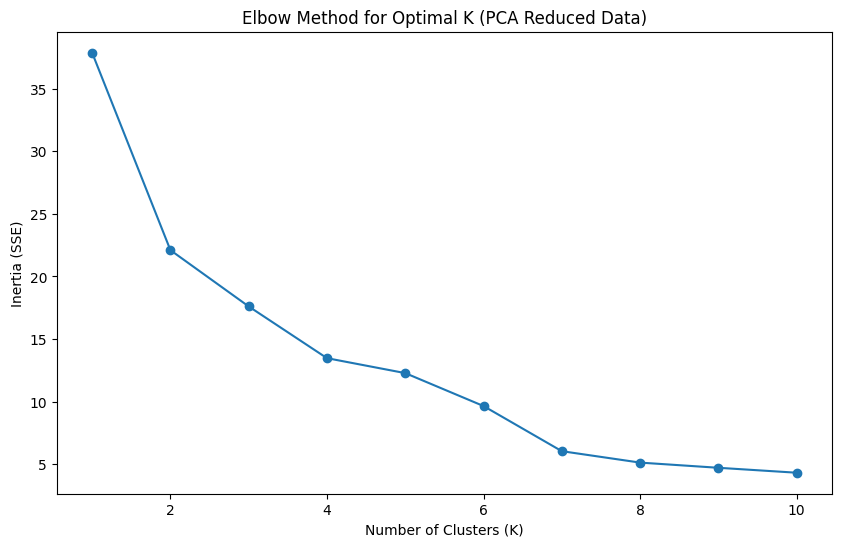

In [8]:
# Elbow graph

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_pca)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method for Optimal K (PCA Reduced Data)')
plt.show()

The elbow in the graph appears to be 2 or 4.

In [9]:
# Fitting model

kmod = KMeans(n_clusters=4, random_state=1)

kmod.fit(x_pca)

KMeans(n_clusters=4, random_state=1)

In [10]:
# Adding labels

labels = kmod.labels_

df['Clusters'] = labels

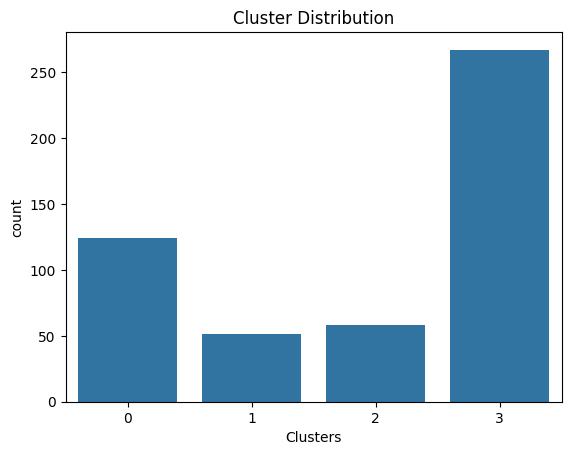

In [11]:
# Groupby cluster

sns.countplot(data=df, x='Clusters')

plt.title('Cluster Distribution')

plt.show()

As illustrated above, the largest cluster is 3 with over half of the data and the smallest cluster is 1 with roughly a tenth of the data.

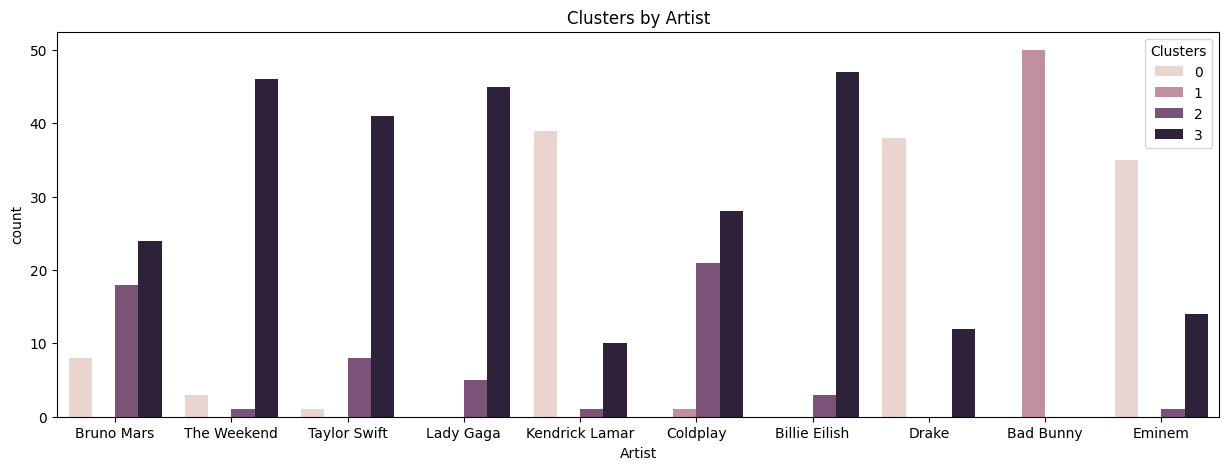

In [12]:
# Artist and cluster

plt.figure(figsize=(15, 5))

sns.countplot(data=df, x='Artist', hue='Clusters')

plt.title('Clusters by Artist')

plt.show()

It appears that for each individual artist the majority of their 50 sampled songs belongs to cluster 3. This is with the exception of Kendrick Lamar, Drake, and Eminem who have cluster 0 as their majority. Interestingly, even when only taking lyrics into consideration, the rap artists are all sorted into the same group. Bad Bunny is also a rap artist but sings primarily in Spanish. All of his songs have been sorted into cluster 1 and apart from some songs from Coldplay, he makes up the majority of cluster 1.

In [13]:
# Bad Bunny songs

bb = df[df['Artist'] == 'Bad Bunny']

bb

,Song,Lyrics,Artist,Clusters
400,Amorfoda,96 Contributors Translations English Deutsch I...,Bad Bunny,1
401,Tu No Metes Cabra,43 Contributors Translations English Deutsch T...,Bad Bunny,1
402,Yonaguni,54 Contributors Translations Deutsch English Y...,Bad Bunny,1
403,Mia,119 Contributors Translations English Deutsch ...,Bad Bunny,1
404,Jowell And Randy And Nengo Flow Safaera,66 Contributors Translations Deutsch English S...,Bad Bunny,1
405,Dtmf,46 Contributors Translations Русский Türkçe Fr...,Bad Bunny,1
406,And Jhayco Dakiti,46 Contributors Translations Türkçe Português ...,Bad Bunny,1
407,Chambea,54 Contributors Translations English Deutsch C...,Bad Bunny,1
408,Soy Peor,59 Contributors Translations English Deutsch S...,Bad Bunny,1
409,Si Veo A Tu Mama,52 Contributors Translations 日本語 Deutsch Svens...,Bad Bunny,1


In [14]:
# Bad Bunny example

bb['Lyrics'][400]

"96 Contributors Translations English Deutsch Italiano Shqip Amorfoda Lyrics No quiero que má' nadie me hable de amor Ya me cansé, to' eso' truco' ya me lo' sé Eso' dolore' lo' pasé, yeh, yeh, yeh No quiero que má' nadie me hable de amor  Ya me cansé, to' eso' truco' ya me lo' sé  Eso' dolore' lo' pasé  Hoy te odio, no e' secreto, ante todo lo confieso  Si pudiera, te pidiera que devuelva' to' los beso' que te di La' palabra' y todo el tiempo que perdí Me arrepiento una y mil vece' de haber confiao' en ti  Quisiera que te sienta' como yo me siento  Quisiera ser como tú, sin sentimiento'  Quisiera sacarte de mi pensamiento  Quisiera cambiarle el final al cuento Toa' la' barra' y lo' trago' han sido testigo' Del dolor que me causaste y to' lo que hiciste conmigo Un infeliz en el amor que aún no te supera Y que ahora camina solo, sin nadie, por toa' la' acera' Preguntándole a Dios si en verdad el amor existe Y por qué si yo era tan bueno toa' esta mierda tú me hiciste  Lo má' cabrón e' qu

Unsurprisingly it appears most, if not all, of Bad Bunny's songs are in Spanish.

In [15]:
# Coldplay

cc = df[df['Artist'] == 'Coldplay']

cc['Lyrics'][265]

"40 Contributors Translations Español Deutsch Français Tiếng Việt Polski Italiano Українська \u200bfeelslikeimfallinginlove Lyrics I know that this could hurt me bad I know that this could feel like that But I just can't stop Let my defences drop I know that I was born to kill Any angel on my windowsill But it's so dark inside I throw the windows wide I know, la-la-la-la-la-la-la-la-la I know, la-la-la-la-la-la-la-la Still I don't let go And fields of flowers grow Oh, it feels like I'm fallin' in love Maybe for the first time Baby, it's my mind you blow It feels like I'm fallin' in love You're throwin' me a lifeline This is for a lifetime, I know I know that in this kind of scene Of two people there's a spark between One gets torn apart One gets a broken heart I know, la-la-la-la-la-la-la-la-la I know, la-la-la-la-la-la-la-la Still I don't let go And fields of flowers grow Oh, it feels like I'm fallin' in love Maybe for the first time Baby, it's my mind you blow It feels like I'm falli

The sole song by another artist in cluster 1 is by Coldplay. Lyrically it appears to be an outlier in the cluster. Based on generalizations it seems as though it should be with the majority of the pop songs in cluster 3.

In [16]:
# Cluster 3

clus_three = df[df['Clusters'] == 3].groupby('Artist').count()

clus_three

,Song,Lyrics,Clusters
Artist,,,
Billie Eilish,47,47,47
Bruno Mars,24,24,24
Coldplay,28,28,28
Drake,12,12,12
Eminem,14,14,14
Kendrick Lamar,10,10,10
Lady Gaga,45,45,45
Taylor Swift,41,41,41
The Weekend,46,46,46


At a glance this cluster appears sensible being composed of pop artists, though the top 10 artists are mostly pop artists. The model has a harder time making finer distinctions between lyrics.

In [17]:
# Cluster 0

clus_zero = df[df['Clusters'] == 0].groupby('Artist').count()

clus_zero

,Song,Lyrics,Clusters
Artist,,,
Bruno Mars,8,8,8
Drake,38,38,38
Eminem,35,35,35
Kendrick Lamar,39,39,39
Taylor Swift,1,1,1
The Weekend,3,3,3


Cluster 0, the second highest populated cluster, appears to be composed of primarily the rappers, with a few outliers.

In [18]:
# Taylor Swift

ts= df[df['Artist'] == 'Taylor Swift']

ts['Lyrics'][109]

'142 Contributors Translations Türkçe Português Español العربية فارسی Српски Français Italiano Česky Українська Беларуская Català ไทย / Phasa Thai Македонски Slovenščina Norsk  Polski Deutsch Down Bad Lyrics Did you really beam me up In a cloud of sparkling dust Just to do experiments on? Tell me I was the chosen one Showed me that this world is bigger than us Then sent me back where I came from For a moment, I knew cosmic love Now I\'m down bad, cryin\' at the gym Everything comes out teenage petulance "Fuck it if I can\'t have him" "I might just die, it would make no difference" Down bad, wakin\' up in blood Starin\' at the sky, come back and pick me up Fuck it if I can\'t have us I might just not get up, I might stay Down bad Fuck it if I can\'t have him Down bad Fuck it if I can\'t have him Did you take all my old clothes Just to leave me here, naked and alone In a field in my same old town That somehow seems so hollow now? They\'ll say I\'m nuts if I talk about The existence of yo

After looking at the lyrics for the Taylor Swift song in cluster 0, it is more sensible why this song would be grouped into this cluster. "Down Bad" is quite different lyrically from the rest of Swift's songs.

In [19]:
# Cluster 2

clus_two = df[df['Clusters'] == 2].groupby('Artist').count()

clus_two

,Song,Lyrics,Clusters
Artist,,,
Billie Eilish,3,3,3
Bruno Mars,18,18,18
Coldplay,21,21,21
Eminem,1,1,1
Kendrick Lamar,1,1,1
Lady Gaga,5,5,5
Taylor Swift,8,8,8
The Weekend,1,1,1


Cluster 2 is the second smallest populated cluster. Outwardly, based on artists alone, it seems as though it could easily be part of cluster 3 with the other pop songs.

In [20]:
# Billie Eilish

be = df[df['Artist'] == 'Billie Eilish']

be['Lyrics'][335]

"176 Contributors Translations Česky Српски Dansk Svenska Türkçe Español Русский Română Português Norsk  Italiano Magyar Deutsch Français فارسی NDA Lyrics Did you think I'd show up in a limousine?  Had to save my money for security Got a stalker walkin' up and down the street Says he's Satan and he'd like to meet I bought a secret house when I was seventeen  Haven't had a party since I got the keys Had a pretty boy over, but he couldn't stay On his way out, made him sign an NDA, mm Yeah, I made him sign an NDA Once was good enough 'Cause I don't want him havin' shit to say, oh-oh-oh You couldn't save me, but you can't let me go, oh, no I can crave you, but you don't need to know, oh-oh Mm, mm-mm, mm 30 Under 30 for another year  I can barely go outside, I think I hate it herе  Maybе I should think about a new career  Somewhere in Kauai where I can disappear I've been havin' fun gettin' older now Didn't change my number, made him shut his mouth  At least I gave him somethin' he can cry 

In [21]:
# Bruno Mars

bm = df[df['Artist'] == 'Bruno Mars']

bm['Lyrics'][9]

"100 Contributors Translations Português Deutsch Talking to the Moon Lyrics I know you're somewhere out there, somewhere far away I want you back, I want you back My neighbors think I'm crazy, but they don't understand You're all I had, you're all I had At night when the stars light up my room I sit by myself Talkin' to the moon Tryna get to you In hopes you're on the other side talkin' to me, too Or am I a fool who sits alone Talkin' to the moon? Oh I'm feeling like I'm famous, the talk of the town They say I've gone mad, yeah, I've gone mad But they don't know what I know ,  'cause when the sun goes down Someone's talkin' back, yeah, they're talkin' back, oh At night when the stars light up my room I sit by myself Talkin' to the moon Tryna get to you In hopes you're on the other side talkin' to me, too Or am I a fool who sits alone Talkin' to the moon? Oh-oh, oh-oh, oh-oh Do you ever hear me callin'? Oh-oh , oh-oh  Oh-oh 'Cause every night, I'm talkin' to the moon Still tryna get to 

Outwardly there seems to be no obvious theme for cluster 2, as the above songs are very different lyrically.

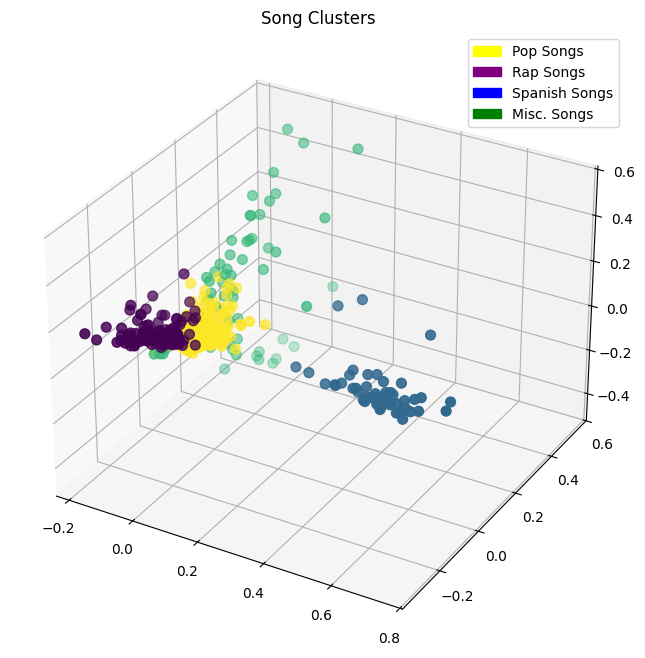

In [22]:
# Scatterplot representation

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x_pca[:, 0], x_pca[:, 1], x_pca[:, 2], c=labels, s=50)
plt.title("Song Clusters")

# Legend

yellow_patch = mpatches.Patch(color='yellow', label='Pop Songs')
purple_patch = mpatches.Patch(color='purple', label='Rap Songs')
blue_patch = mpatches.Patch(color='blue', label='Spanish Songs')
green_patch = mpatches.Patch(color='green', label='Misc. Songs')
plt.legend(handles=[yellow_patch, purple_patch, blue_patch, green_patch])

plt.show()

The clusters all appear to be grouped together definitively, with cluster 2 (green) having a little less separation and more spread. Generally the model seems to cluster the songs efficiently with obvious distinctions between clusters 0 (rap songs), 1 (spanish songs) and 3 (pop songs), with cluster 2 (miscellaneous music) being less apparent.

## Model 2: More PCA Components

In [25]:
pca = PCA(n_components= 20)

x_pca = pca.fit_transform(tfidf_matrix.toarray())

The second model will take more PCA components into consideration in the attempt to add more complexity and differentiation between clusters.

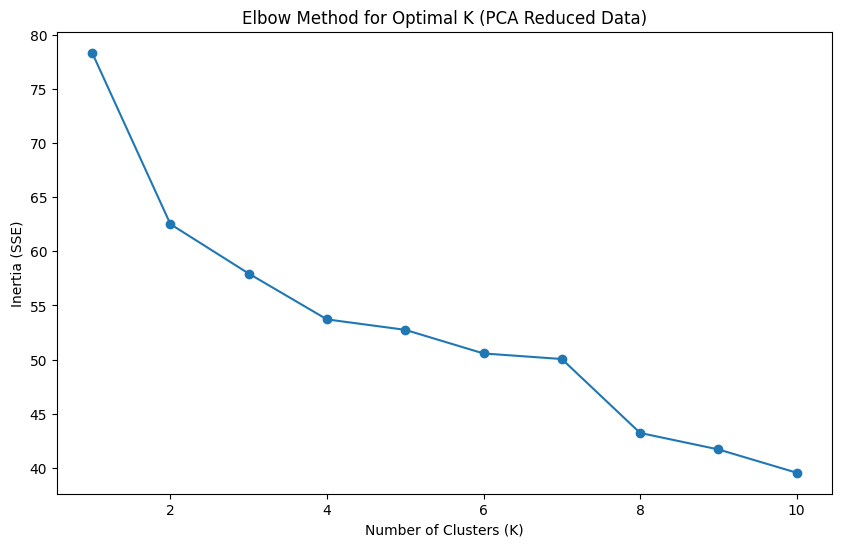

In [26]:
# Elbow graph

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_pca)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method for Optimal K (PCA Reduced Data)')
plt.show()

Again, the elbow appears to be at the 4 mark, or even 2.  

In [27]:
# Fitting model

kmod = KMeans(n_clusters=4, random_state=1)

kmod.fit(x_pca)

KMeans(n_clusters=4, random_state=1)

In [28]:
# Adding labels

labels = kmod.labels_

df['Clusters 2'] = labels

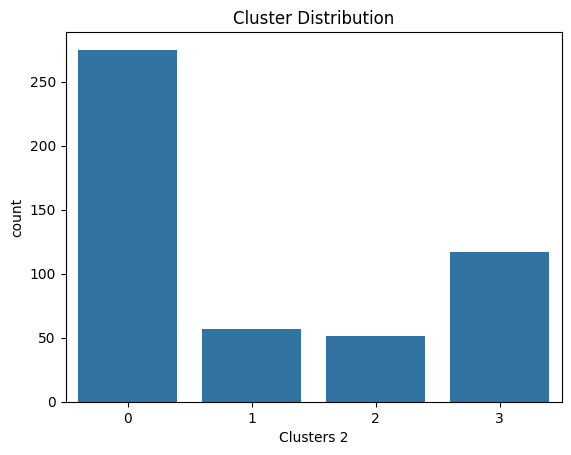

In [29]:
# Groupby cluster

sns.countplot(data=df, x='Clusters 2')

plt.title('Cluster Distribution')

plt.show()

Adding more components appears to have changed the cluster distribution.

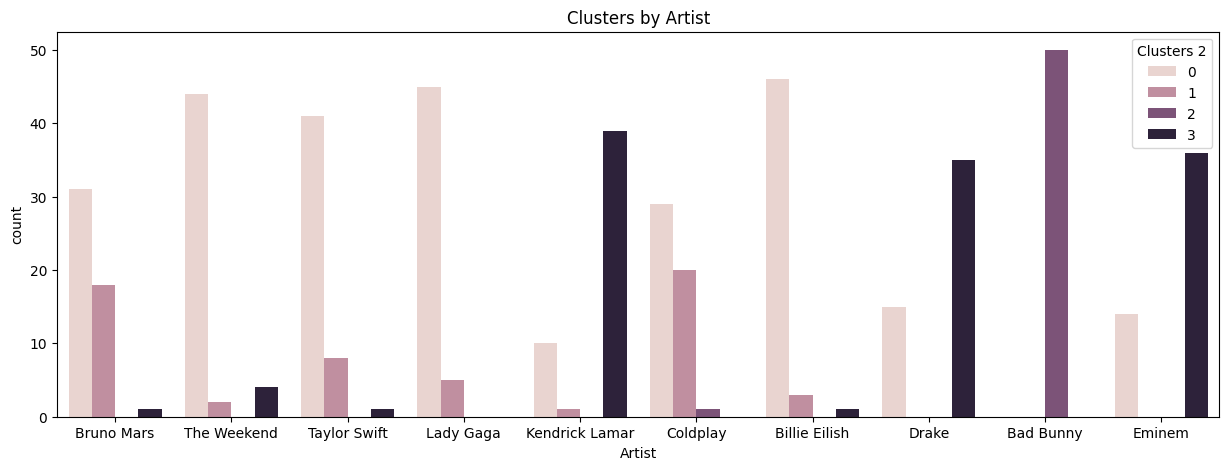

In [30]:
# Artist and cluster

plt.figure(figsize=(15, 5))

sns.countplot(data=df, x='Artist', hue='Clusters 2')

plt.title('Clusters by Artist')

plt.show()

The models are still quite similar though with rappers being grouped primarily in cluster 3, Bad Bunny is the majority of cluster 2, and cluster 0 is populated with pop singers. Cluster 1 is now the miscellaneous cluster.

In [31]:
# Cluster 1

clus_one = df[df['Clusters 2'] == 1].groupby('Artist').count()

clus_one

,Song,Lyrics,Clusters,Clusters 2
Artist,,,,
Billie Eilish,3,3,3,3
Bruno Mars,18,18,18,18
Coldplay,20,20,20,20
Kendrick Lamar,1,1,1,1
Lady Gaga,5,5,5,5
Taylor Swift,8,8,8,8
The Weekend,2,2,2,2


Bruno Mars and Coldplay make up the majority of cluster 1.

In [32]:
# Cluster 1 songs

df[df['Clusters 2'] == 1]

,Song,Lyrics,Artist,Clusters,Clusters 2
0,Thats What I Like,205 Contributors Translations Français Deutsch...,Bruno Mars,2,1
7,Grenade,144 Contributors Translations Português França...,Bruno Mars,2,1
9,Talking To The Moon,100 Contributors Translations Português Deutsc...,Bruno Mars,2,1
10,Count On Me,99 Contributors Translations Türkçe Count on M...,Bruno Mars,2,1
12,Treasure,94 Contributors Translations Português Deutsch...,Bruno Mars,2,1
13,The Lazy Song,88 Contributors Translations Türkçe The Lazy S...,Bruno Mars,2,1
14,Chunky,57 Contributors Chunky Lyrics She gotta shake ...,Bruno Mars,2,1
16,Gorilla,54 Contributors Translations Português Gorilla...,Bruno Mars,2,1
22,Calling All My Lovelies,39 Contributors Calling All My Lovelies Lyrics...,Bruno Mars,2,1
24,If I Knew,31 Contributors If I Knew Lyrics A song about ...,Bruno Mars,2,1


The miscellaneous clusters appear to be the same with the same songs. Even though the cluster could be defined by Bruno Mars and Coldplay, most of these artists' songs are already in cluster 0. Ultimately KMeans is good for general differences, but less so where content and specific lyrical distinctions are concerned.